# Applicant Details

* Full Name: Omeh, Chukwuemeka Christian
* Email: chukwuemekao241@gmail.com
* Phone Number: 08165468858
* Linkeld Profile: [Click Here](https://www.linkedin.com/in/omeh-chukwuemeka-christian-b49b7413a)
* Assessment Github Repo: [Click Here](https://github.com/ChrisOmeh/Cyphercrescent_Test_Exercise)

## PROJECT ARCHITECTURE

### Tools
* Excel
* Python language
* Pycharm IDE
* Flask
* Turtle
* Tkinter
* Jupyter Notebook
* Git and Github

### Aim
* To develop a computer program that will find the value of Z-factor using the production and PVT data given.

# Exercise Two
The equation given by Hall and Yarborough (Ikoku, 1984) is given below:

$z =  \frac{0.06125P_{pr}te^{-1.2(1-t)^2}}{y} $

Where t = 1 / Tpr, and y = the reduced density which is obtained as the solution of the equation: 

$ F(y) = \ 0.06125P_{pr}te^{-1.2(1-t)^2} + \frac{y+y^2+y^3-y^4}{(1-y)^3} - \ (14.76t - 9.76t^2 + 4.58t^3)y^2 + \ (90.7t - 242.2t^2 + 42.4t^3)y^ {2.18+2.82t} $


Ppr is defined as the Pseudo Reduced Pressure; while Tpr is defined as the Pseudo Reduced  Temperature.  
Ppc = 677 + 15.0 γg - 37.5 γg2; and Tpc = 168 + 325 γg - 12.5 γg2, where γg is the specific gravity. 
For Natural gas with specific gravity of 0.7, at a pressure of 2000 psia and a temperature of 180 deg  Fahrenheit, use the equations above to calculate the z-factor, considering the presence of the non hydrocarbon components: N2 = 0.5%, CO2 = 2% and H2S = 0.1%. 

# Import libraries
* Pandas: Is python library for data analysis. In this case, it will help us create a table of gas componets
* numpy: Is python library for numeric computing. Will help us in handling large operations
* matplot and seaborn: Are libraries for visualizations
* math and cmath: Are python module for performing mathematical operations
* scipy: Is python library for performing scientific computations. It will help us solve F(y) using Newton Raphson Iterative Technique

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import *
from cmath import *

In [2]:
# Creating component table
"""
Since the question said "considering presence of non hydrocarbon components", 
we shall find various properties of these gas.

Percenatge of Non hydrocarbon gas components:
N2 = 0.5%
CO2 = 2%
H2S = 0.1%

Gas specific gravity(Yg) = 0.7
"""
com_table_dict = {"Components": ["N2", "CO2", "H2S"],
             "Mole fraction(Yi)": [0.005, 0.02, 0.001],
             "Molecular weight(Mi)": [28.01, 44.01, 34.08],
             "Critical Temp(Tci)": [227, 548, 672],
             "Critical pressure(Pci)": [493, 1071, 1306]
            }

com_tb = pd.DataFrame.from_dict(com_table_dict)
com_tb.head()

,Components,Mole fraction(Yi),Molecular weight(Mi),Critical Temp(Tci),Critical pressure(Pci)
0,N2,0.005,28.01,227,493
1,CO2,0.020,44.01,548,1071
2,H2S,0.001,34.08,672,1306


In [3]:
com_tb["YiMi"] = com_tb.apply(lambda x: x['Mole fraction(Yi)'] * x['Molecular weight(Mi)'], axis = 1)
com_tb["Tpc"] = com_tb.apply(lambda x: x['Mole fraction(Yi)'] * x['Critical Temp(Tci)'], axis = 1)
com_tb["Ppc"] = com_tb.apply(lambda x: x['Mole fraction(Yi)'] * x['Critical pressure(Pci)'], axis = 1)
com_tb.head()

,Components,Mole fraction(Yi),Molecular weight(Mi),Critical Temp(Tci),Critical pressure(Pci),YiMi,Tpc,Ppc
0,N2,0.005,28.01,227,493,0.14005,1.135,2.465
1,CO2,0.020,44.01,548,1071,0.88020,10.960,21.420
2,H2S,0.001,34.08,672,1306,0.03408,0.672,1.306


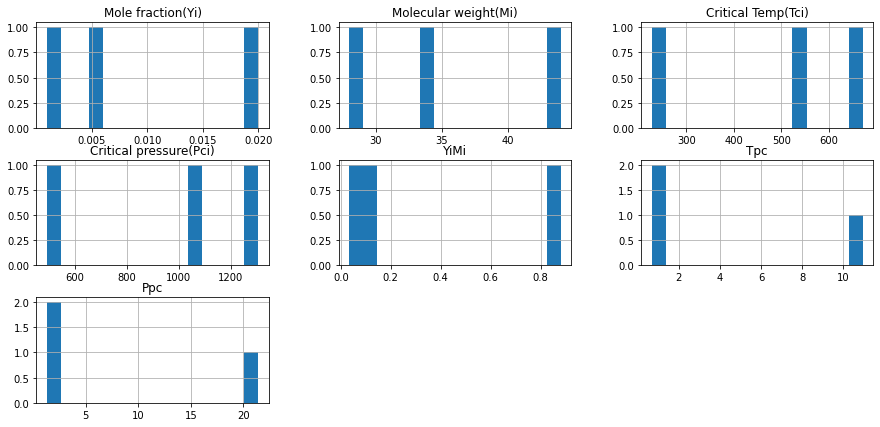

In [4]:
com_tb.hist(bins = 15, figsize = (15, 7));

In [5]:
Gas_specific_gravity = 0.7
overall_Tpc = round(com_tb['Tpc'].sum(),3) + (168 + 325*(Gas_specific_gravity) - 12.5*pow(Gas_specific_gravity, 2))
print("The overall Pseudo critical temperature is: {} deg R".format(overall_Tpc))

The overall Pseudo critical temperature is: 402.142 deg R


In [6]:
overall_Ppc = round(com_tb['Ppc'].sum(),3) + (677 + 15*(Gas_specific_gravity) - 37.5*pow(Gas_specific_gravity, 2))
print("The overall Pseudo critical pressure is: {}psia".format(overall_Ppc))

The overall Pseudo critical pressure is: 694.316psia


In [7]:
Temperature_F = 180
# Converting to deg rankine
Temperature_R = 460+180
Tpr = round(Temperature_R/overall_Tpc, 2)
print(f"The Pseudo reduced temperature(Tpr) is: {Tpr}")

The Pseudo reduced temperature(Tpr) is: 1.59


In [8]:
# Finding the Pseudo reduced pressure
pressure = 2000
Ppr = round(pressure/overall_Ppc, 2)
print(f"The pseudo reduced pressure(Ppr) is: {Ppr}")

The pseudo reduced pressure(Ppr) is: 2.88


In [9]:
# Finding t parametre of F(y)

t = round(pow(Tpr, -1),2)
print(f"The value of t is: {t}")

The value of t is: 0.63


# Apply Newton Raphson Iterative Technique on the F(y)
## Conditions

1. Find the first derivative f'(y) and define the Newton Raphson equation
2. Guess initial value of y for the first iteration
3. Substitute y in the Newton Raphson equation and calculate the y<sup>*</sup>
4. If absolute |y<sup>*</sup> - y| < tolerance, stop iteration and output the root y<sup>*</sup>
5. If number of iteration reaches assumed max value, stop

In [10]:
# F(y) = (-0.06125*Ppr*t*e-1.2*(1-t)**2) + ((y+y**2+y**3-y**4)/(1-y)**3) - ((14.76*t - 9.76*t**2 + 4.58*t**3)*y**2)+
#         ((90.7*t - 242.2*t**2 + 42.4*t**3)*y**(2.18 + 2.82*t))
    
# -0.00458 + ((y + y**2+y**3-y**4)/(1-y)**3) - 6.57*y**2 - 28.39*y**4

In [11]:
# Finding the roots of function F(y) to determine value of y parametre
def Newton_Raphason():
    from scipy import optimize

    def fun(y):
        return (-0.06125*Ppr*t*e**-1.2*(1-t)**2) + ((y+y**2+y**3-y**4)/(1-y)**3) - ((14.76*t - 9.76*t**2 + 4.58*t**3)*y**2)+((90.7*t - 242.2*t**2 + 42.4*t**3)*y**(2.18 + 2.82*t))

    roots = optimize.newton(fun, x0 = 2, full_output=True)
    print(roots,"\n")
    print("The roots of the F(y) is: {:.5f}".format(roots[0]))
    return roots[0]
Newton_Raphason()

(0.004636627842256463,       converged: True
           flag: 'converged'
 function_calls: 33
     iterations: 32
           root: 0.004636627842256463) 

The roots of the F(y) is: 0.00464


0.004636627842256463

* From the result of using Newton Raphson Iterative technique to solve the F(y), the best value of y is 0.00464

In [12]:
# Determing Gas Deviation Factor or z-factor(z)

def z_factor(Ppr = 2.88, t = 0.63, y = 0.004636627842256463):
    Z_factor = 0.06125*Ppr*t*e**-1.2*(1-t)**2 / y
    return round(Z_factor,3)
z_factor()

0.988

# Reuseable code script or snippet

* method to calculate Ppc
* method to calcualte Tpc
* method to calculate t
* method to find y

In [13]:
class Z_factor:
    def __init__(self, Yg = float(input("Pls enter the value of Gas specific Gravity, Yg"))):
        self.Yg = Yg
    
    def Pseudo_critical_pressure(self):
        Ppc = 677 + 15*(self.Yg) - 37.5*pow(self.Yg, 2)
        return Ppc
    
    def Pseudo_critical_temp(self):
        Tpc = 168 + 325*(self.Yg) - 12.5*pow(self.Yg, 2)
        return Tpc
    
    def t_param(self):
        t = 1/ self.Pseudo_critical_temp(self)
        return t
        
    def Newton_Raphason_y(self):
        from scipy import optimize

        def fun(y):
            return (-0.06125*Ppr*t*e**-1.2*(1-t)**2) + ((y+y**2+y**3-y**4)/(1-y)**3) - ((14.76*t - 9.76*t**2 + 4.58*t**3)*y**2)+((90.7*t - 242.2*t**2 + 42.4*t**3)*y**(2.18 + 2.82*t))

        roots = optimize.newton(fun, x0 = 2, full_output=True)
        y = roots[0]
        return round(y, 5)
    
    def z_factor(self):
        Z_factor = 0.06125*Ppr*t*e**-1.2*(1-t)**2 / self.Newton_Raphason_y()
        return "The z-factor is {}".format(round(Z_factor,3))


Z  = Z_factor()
Z.z_factor()
        

Pls enter the value of Gas specific Gravity, Yg0.7


'The z-factor is 0.988'